---

**SCENARIO:**  The allocation of public money (obtained from the public via taxes) is a politically sensitive activity with governments regularly coming under scrutiny for how this money is spent. A respected media organisation is looking into the Queensland Government's Advance Queensland program. The resulting story could be a "good news" story reporting on the success of the program, however if inappropriate spending or irregularities are found, it could become a story that is critical of the scheme, and potentially the Government.

The goal is to analyse the publicly available data on the distribution of the funds over time and look for patterns that may support the "good news" story, or which may be a cause for concern. The insights into (a) the balance between South-East Queensland and the remainder of the state (regional Queensland); and (b) how distributions align with the objectives of the scheme which may include supporting specified groups of people will be included. 

---


**This analysis is focus on analysing the dataset based on the following questions:**

- How much was the funding for each program?
- Does South-East Queensland and the remainder of the state (regional Queensland) influence the programs and their funding distribution?
- How is the program funding distributed to each community?
- What projects does each community have and how do distributions align with the objectives of the scheme which may include supporting specified groups of people?

To understand the level of importance of each column, I can have a better insight into the dataset. 

**Assumption**
- Some columns are marked 'if applicable' and over 75% are missing data. We can assume that they are less important for the analysis.
- The dataset includes two postcode columns (Physical Address of Recipient - Post Code & Primary Location of Activity/Project - Post Code) with relative suburbs' names and more missing data than the relative suburbs' names. Therefore, there seems to be a high correlation between those columns. In this case, I assume there will be no impact on the analysis if we include these two postcode columns.
- Brisbane area has more people living in this state, I assume it will receive more funding than other states. On the other hand, the Logan area has fewer people, therefore, they might not receive as much funding as the Brisbane area. The same principle applies to *South-East Queensland* area vs *Regional-Queensland* area.
- Assume that the information in the dataset is correct. E.g. The columns State Electorate and RAP Region have no NonQueensland cases.
  
To have a better understanding of the insight, the balance between South-East Queensland and the remainder of the state (regional Queensland) as well as how distributions align with the objectives of the scheme which may include supporting specified groups of people will be considered in this analysis. The below columns will be used in this analysis:
`Program`, `Recipient Name`, `Investment/Project Title`, `RAP Region`, `Actual Contractual Commitment ($)` 

**Note:** 

**SEQ:** Brisbane City Council, City of Moreton Bay, Ipswich City Council, Lockyer Valley Reginal Council, Logan City Council, Noosa Council, Redland City Council, Scenic Rim Regional Council, Somerset Regional Council, Sunshine Coast Council, Toowoomba Regional Council



### Import and prepare the data

As above mentioned, I filter out those columns that are going to be used in the analysis. It is crucial to understand the datatype, missing data, and unusual cases of each column. 

**Preparation:**
1. Filter out categories that are not used in this analysis, so the dataframe will only include `Program`, `Recipient Name`, `Investment/Project Title`, `RAP Region`, and `Actual Contractual Commitment ($)`
2. According to the following information, the `RAP Region` has unusual cases with **NonQueensland** value in the dataset. Since the unusual cases are less than 1% of the total dataset, therefore, I would like to focus on the funding distribution and replace unusual with the value that has the maximum number.
   - *NonQueensland* in RAP Region will be replaced with *Brisbane and Redlands*

In [27]:
import pandas as pd
import numpy as np 
import plotly.express as px

In [28]:
df_name = 'assignment_1_dataset.csv'
df_file = 'data/'
df_new = pd.read_csv(f'{df_file}{df_name}')
df_new.head()

,_id,Program,Round,Recipient Name,Physical Address of Recipient - Suburb/Location,Physical Address of Recipient - Post Code,University Collaborator (if applicable),Other Partners; Collaborators (if applicable),Investment/Project Title,Primary Location of Activity/Project - Suburb,Primary Location of Activity/Project - Post Code,Multiple Locations of Activity/Project (if applicable),Approval date,Local Government /Council,RAP Region,State Electorate,Actual Contractual Commitment ($)
0,1,Aboriginal and Torres Strait Islander PhD Scho...,AQ Aboriginal & Torres Strait Islander PhD Sch...,Central Queensland University,Norman Gardens,4701.0,NaN,BHP Billiton,Decolonising the systematic barriers and enabl...,Brisbane City,4001.0,NaN,2019-06-14T00:00:00,Rockhampton (R),Brisbane and Redlands,Keppel,107084
1,2,Aboriginal and Torres Strait Islander PhD Scho...,AQ Aboriginal & Torres Strait Islander PhD Sch...,Griffith University,Nathan,4111.0,NaN,NaN,An indigenous journey through the 21st century...,Nathan,4111.0,NaN,2016-01-28T00:00:00,Brisbane (C),Brisbane and Redlands,Toohey,117500
2,3,Aboriginal and Torres Strait Islander Research...,AQ Aboriginal & Torres Strait Islander Researc...,Queensland University of Technology,Brisbane City,4000.0,NaN,Engineered Wood Products Association Australa...,An Innovative Framing System for Taller Timber...,Brisbane City,4000.0,NaN,2018-08-21T00:00:00,Brisbane (C),Brisbane and Redlands,McConnel,240000
3,4,Aboriginal and Torres Strait Islander Research...,AQ Aboriginal & Torres Strait Islander Researc...,CSIRO,Smithfield,4878.0,NaN,CSIRO,Transforming hidden data: An integrative infor...,Smithfield,4878.0,NaN,2016-01-28T00:00:00,Cairns (R),Far North Queensland,Barron River,158032
4,5,Advancing Regional Innovation Program,AQ Advancing Regional Innovation Full 2016-17,Redland City Council,Cleveland,4163.0,NaN,Community Information Support Services Ltd \n...,Growing innovation in the Redlands and Logan r...,Cleveland,4163.0,"Meadowbrook, Alexandra Hills, Springwood",2017-09-21T00:00:00,Redland (C),Brisbane and Redlands,Oodgeroo,500000


In [29]:
df_B = df_new[['Program', 'Recipient Name', 'Investment/Project Title', 'RAP Region', 'Actual Contractual Commitment ($)']]
df_B.head()

,Program,Recipient Name,Investment/Project Title,RAP Region,Actual Contractual Commitment ($)
0,Aboriginal and Torres Strait Islander PhD Scho...,Central Queensland University,Decolonising the systematic barriers and enabl...,Brisbane and Redlands,107084
1,Aboriginal and Torres Strait Islander PhD Scho...,Griffith University,An indigenous journey through the 21st century...,Brisbane and Redlands,117500
2,Aboriginal and Torres Strait Islander Research...,Queensland University of Technology,An Innovative Framing System for Taller Timber...,Brisbane and Redlands,240000
3,Aboriginal and Torres Strait Islander Research...,CSIRO,Transforming hidden data: An integrative infor...,Far North Queensland,158032
4,Advancing Regional Innovation Program,Redland City Council,Growing innovation in the Redlands and Logan r...,Brisbane and Redlands,500000


In [30]:
df_B.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Program                            1000 non-null   object
 1   Recipient Name                     1000 non-null   object
 2   Investment/Project Title           1000 non-null   object
 3   RAP Region                         1000 non-null   object
 4   Actual Contractual Commitment ($)  1000 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 39.2+ KB


The following information indicates that the RAP Region includes unusual **NonQueensland** cases. 
RAP Region stands for Regional Action Plan Region which is the individual project's suburb/location. Besides, the dataset is about the Queensland Government's Advance Queensland program. Therefore, those cases are not normal for the RAP region. 
However, because it only has **less than 1% of the total dataset**, I replaced it with *Brisbane and Redlands* which has the maximum number in the RAP region. 

In [31]:
def data_info (df):
    for col in df:
        print('--------------------------------------------------------------------------------')
        print(df[col].value_counts())

data_info(df_B)

--------------------------------------------------------------------------------
Program
Ignite Ideas Fund                                                407
Knowledge Transfer Partnerships                                  154
Hot DesQ                                                         127
Industry Research Fellowships                                    111
Innovation Partnerships Grants                                    22
PhD Scholarships                                                  22
Advancing Regional Innovation Program                             19
International Delegations                                         17
Deadly Innovation                                                 16
Queensland Startup Events and Activities Fund                     11
Create Queensland                                                 11
Industry Accelerators                                              8
Commercialisation Partnerships Program                             7
Biofutures Com

In [32]:
df_B['RAP Region'] = df_B['RAP Region'].replace('NonQueensland', 'Brisbane and Redlands')
df_B['RAP Region'].value_counts()

/tmp/ipykernel_161/1426647129.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



RAP Region
Brisbane and Redlands    498
Brisbane                 119
Gold Coast                78
Sunshine Coast            66
Far North Queensland      43
Ipswich                   37
Townsville                34
Darling Downs             29
Central Queensland        21
Moreton Bay               15
Wide Bay                  15
Logan                     15
Statewide                 14
Mackay-Whitsunday         10
Outback Queensland         6
Name: count, dtype: int64

### Total Funding for each program

Now the data is prepared, let's look into total funding according to the **individual program**, and **disregards** any *region factor*.

In [33]:
program_fund = pd.DataFrame(df_B.groupby('Program')['Actual Contractual Commitment ($)'].sum()).reset_index()
program_fund.head()

,Program,Actual Contractual Commitment ($)
0,Aboriginal and Torres Strait Islander PhD Scho...,224584
1,Aboriginal and Torres Strait Islander Research...,398032
2,Advancing Regional Innovation Program,6251683
3,Agtech and Logistics Hub,3000000
4,Artificial Intelligence Hub,5000000


Let's take a look at the above information visually, as shown below.

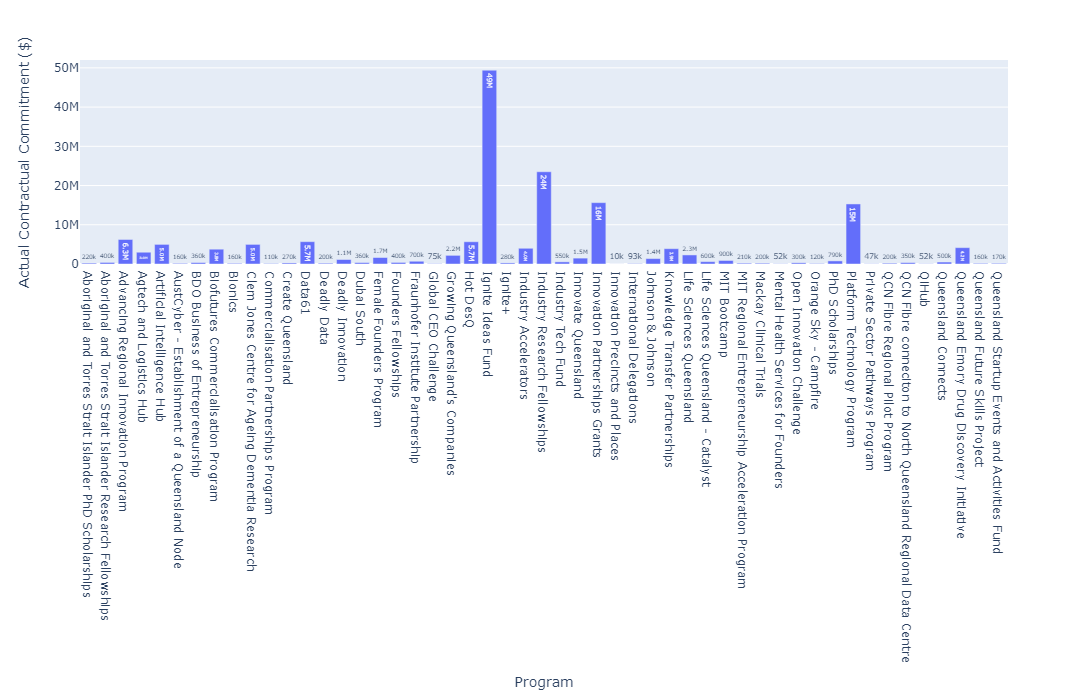

In [34]:
fig = px.bar(program_fund, x='Program', y="Actual Contractual Commitment ($)", text_auto='.2s', width=1050, height=700)
fig.show()

##### How much was the funding for each program?
The bar chart shows the total funding of each program. It is obvious that **Ignite Ideas Fund** has the highest funding of the programs which is 49M funding, the second highest is **Industry Research Fellowships** program which has 24M funding, and the third highest funding is **Innovation Partnerships Grants** program which is 1M funding more than **Platform Technology Program** program, they have 16M and 15M funding respectively. 

However, **before any assumptions or decisions**, I would like to understand the programs and their funding distribution in the **RAP Region**. RAP Region refers to Regional Action Plan (RAP) region which is based on the suburb/location of each project. Since it relates to regions in Queensland, therefore could be a possibility that it will have influences on the programs and their funding. Let's dig into it.

### The Funding Distribution between the RAP Region

After understanding the funding for each program, the following diagram illustrates the funding distribution between the RAP Region.
* **Note:** The following visualization analysis contains the same information as above, **but** it is **further dissects** down into **different regions**.

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



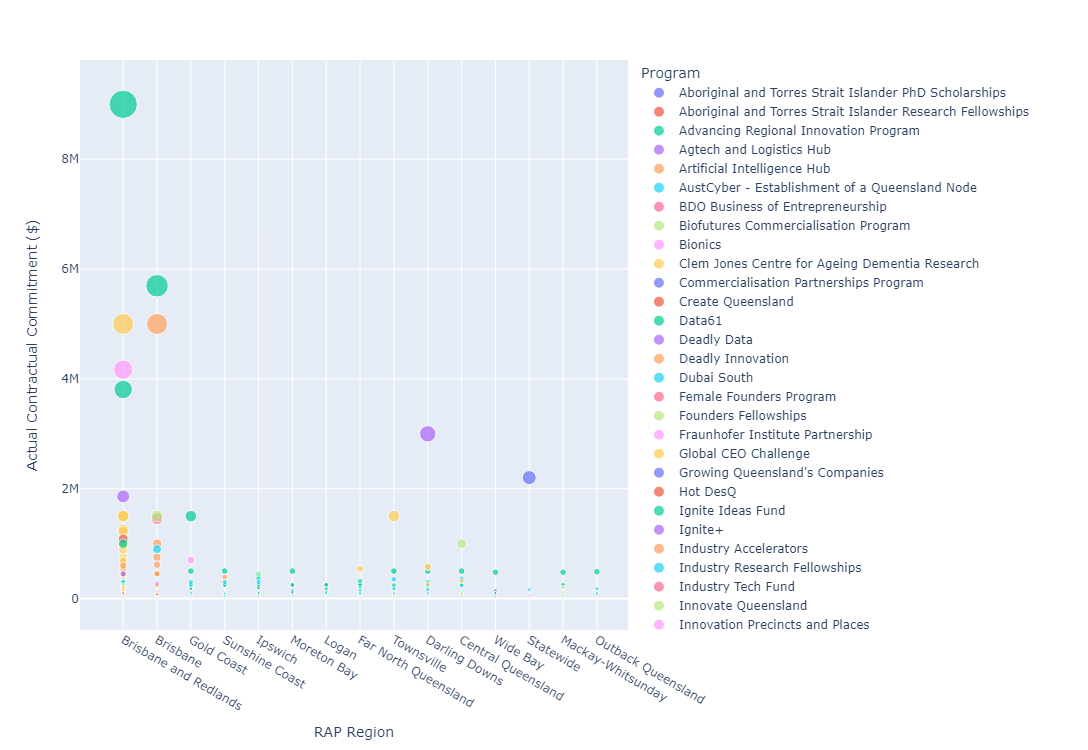

In [35]:
fig = px.scatter(df_B, x="RAP Region", y="Actual Contractual Commitment ($)", color="Program", size="Actual Contractual Commitment ($)", width=1000, height=750)
fig.update_xaxes(categoryorder='array', categoryarray= ['Brisbane and Redlands','Brisbane', 'Gold Coast','Sunshine Coast','Ipswich', 'Moreton Bay', 'Logan', 'Far North Queensland', 'Townsville', 'Darling Downs', 'Central Queensland', 'Wide Bay', 'Statewide', 'Mackay-Whitsunday', 'Outback Queensland', 'NonQueensland'])
fig.show()

The scatter plot above contains the funding information across different programs based on the *regions* and each program funding might be distributed to different regions.

The scatter diagram displays most funding programs were distributed in Brisbane and Redlands, and Brisbane. Besides, these two areas have the most funding. On the other hand, Wide Bay and Outback Queensland have less funding and funding distribution. This could be considered a sign of unbalanced distribution, however, there is no data for the popularity density of each RAP region to support it.

Therefore, I would like to **understand the funding distribution between SEQ and Non-SEQ regions** to have better insight.

To restate, 
* *SEQ* stands for **South-East Queensland**, which contains *Brisbane and Redlands, Brisbane, Gold Coast, Sunshine Coast, Ipswich, Moreton Bay, Logan*
* *Non-SEQ* stands for **outside of South-East Queensland**, which contains *Far North Queensland, Townsville, Darling Downs, Central Queensland, Wide Bay, Statewide, Mackay-Whitesunday, Outback Queensland*.

### The Funding Distribution between SEQ and Non-SEQ regions 
Now I noticed that the funding distribution between RAP region. I would like to dig into it more. Therefore, I created a column called 'SEQ' in the dataframe. I grouped 'SEQ', summed the funding, and plotted it with a bar chart. The following chart illustrates that the total funding distribution between SEQ and Non-SEQ regions. 

In [36]:
SEQ_list = ['Brisbane and Redlands','Brisbane', 'Gold Coast','Sunshine Coast','Ipswich', 'Moreton Bay', 'Logan']
df_B['SEQ'] = df_B['RAP Region'].apply(lambda x: 'Yes' if x in SEQ_list else 'No')

/tmp/ipykernel_161/1437772933.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



After grouping the SEQ, the funding of the SEQ region is significantly higher than the Non-SEQ region, they are **\$142,695,719** and **\$26,816,092** respectively. This is interesting because there are **more than 5 times difference**. 

In [37]:
fund_dis = pd.DataFrame(df_B.groupby('SEQ')['Actual Contractual Commitment ($)'].sum())
fund_dis

,Actual Contractual Commitment ($)
SEQ,
No,26816092
Yes,142695719


Let's visualize them in graph formats.

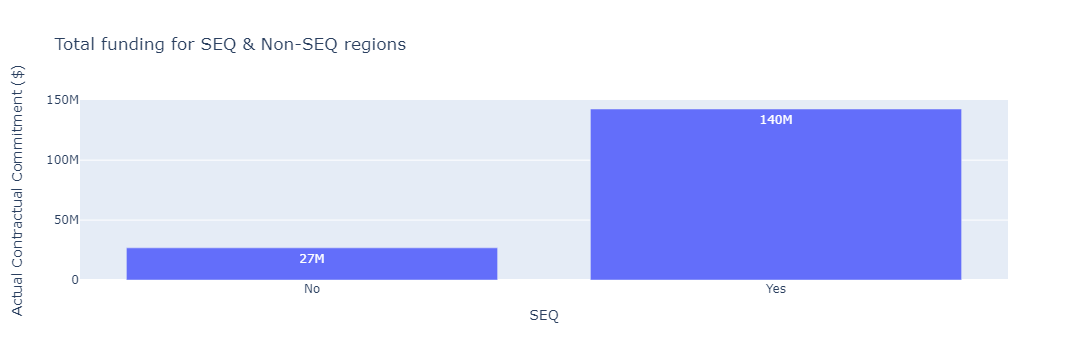

In [38]:
fig = px.bar(fund_dis, x=fund_dis.index, y="Actual Contractual Commitment ($)", text_auto='.2s', title= "Total funding for SEQ & Non-SEQ regions")
fig.show()    

##### Does South-East Queensland and the remainder of the state (regional Queensland) influence the programs and their funding distribution?

The bar chart illustrates that the total funding distributed to the SEQ region is over 5 times higher than the Non-SEQ region. According to the information that I obtained, the program funding is not distributed properly between the SEQ and the Non-SEQ regions. Again, there is no population density data to support it.

To have a better understanding of this situation, I would focus on the purpose of the funding and its reasonability.

### Categorize Programs with Communities
Since the difference in the funding distribution between the SEQ and Non-SEQ regions is unbalanced. It will be helpful to understand what communities were targeted by the programs for both the SEQ and Non-SEQ regions. To do so, I categorized the programs into 5 communities including **Startups and Industry**, **Education and Researchers**, **Technology and Innovation**, **Female**, and **Indigenous** to have further insight into whether the distribution is influenced not only by the RAP Region but also by the targeted communities.

*Including SEQ and Non-SEQ regions.*

In the code below, I will be grouping programs into different categories that are targeted for different communities for further analysis.

In [39]:
industry_list = []
education_list = ['Queensland Emory Drug Discovery Initiative','PhD Scholarships', 'Mackay Clinical Trials','Life Sciences Queensland - Catalyst','Life Sciences Queensland', 'Johnson & Johnson', 'Innovation Partnerships Grants', 'Industry Research Fellowships', 'Fraunhofer Institute Partnership', 'Founders Fellowships', 'Clem Jones Centre for Ageing Dementia Research', 'Bionics', 'Biofutures Commercialisation Program']
female_list = ['Female Founders Program']
indigenous_list = ['Deadly Data', 'Aboriginal and Torres Strait Islander Research Fellowships', 'Aboriginal and Torres Strait Islander PhD Scholarships']
technology_list = ['QiHub', 'QCN Fibre Regional Pilot Program', 'QCN Fibre conneciton to North Queensland Regional Data Centre', 'Platform Technology Program', 'Orange Sky - Campfire', 'Innovate Queensland', 'Data61', 'AustCyber - Establishment of a Queensland Node', 'Artificial Intelligence Hub', 'Advancing Regional Innovation Program', 'Industry Tech Fund']
seen = set()

for item in df_B['Program']:
    if item not in education_list + female_list + indigenous_list + technology_list + list(seen):
        seen.add(item)
        industry_list.append(item)

In the dataframe below, I have added **one additional column**, that groups different programs into their community category.

In [40]:
def condition(x):
    if x in industry_list:
        return "Startups and Industry"
    elif x in education_list:
        return "Education and Researchers"
    elif x in female_list:
        return "Female"
    elif x in indigenous_list:
        return "Indigenous"
    else:
        return "Technology and Innovation"

df_B['Program Community'] = df_B['Program'].apply(condition)
df_B.head()

/tmp/ipykernel_161/2282527971.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Program,Recipient Name,Investment/Project Title,RAP Region,Actual Contractual Commitment ($),SEQ,Program Community
0,Aboriginal and Torres Strait Islander PhD Scho...,Central Queensland University,Decolonising the systematic barriers and enabl...,Brisbane and Redlands,107084,Yes,Indigenous
1,Aboriginal and Torres Strait Islander PhD Scho...,Griffith University,An indigenous journey through the 21st century...,Brisbane and Redlands,117500,Yes,Indigenous
2,Aboriginal and Torres Strait Islander Research...,Queensland University of Technology,An Innovative Framing System for Taller Timber...,Brisbane and Redlands,240000,Yes,Indigenous
3,Aboriginal and Torres Strait Islander Research...,CSIRO,Transforming hidden data: An integrative infor...,Far North Queensland,158032,No,Indigenous
4,Advancing Regional Innovation Program,Redland City Council,Growing innovation in the Redlands and Logan r...,Brisbane and Redlands,500000,Yes,Technology and Innovation


After categorizing the communities, I noticed that some programs target specified communities such as indigenous and female. However, I would like to visualize the funding distribution with a bar chart to have better insight.

### The Funding Distribution Between Communities (marked with separate SEQ & Non-SEQ regions)

By using the dataframe above (grouped with communities), I would like to further dissect them down into **SEQ and Non-SEQ** region to gain more insights to see if there is any "good news" in terms of disproportionate that is unreasonable.

After understanding there are two specified communities, I used a bar chart to visualize the funding and region distribution of different communities. In the bar chart, the differences between each community are obvious. 

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



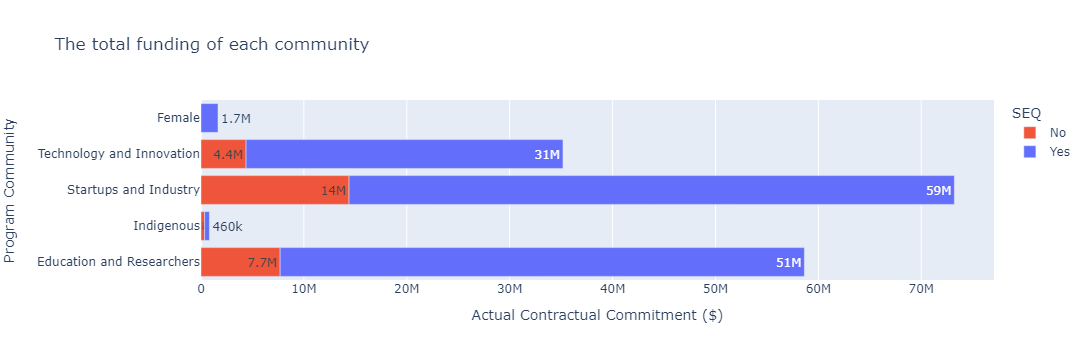

In [41]:
com_df = pd.DataFrame(df_B.groupby(['Program Community', 'SEQ'])['Actual Contractual Commitment ($)'].sum()).reset_index()
com_df
color_map = {'Yes': '#636efa', 'No': '#ef553b'}
fig = px.bar(com_df, x='Actual Contractual Commitment ($)', y='Program Community', color='SEQ', text_auto='.2s', color_discrete_map=color_map, title='The total funding of each community')
fig.show()


Before explaining in details of what is happening in the bar chart above, I would like to **list out** all programs under **each community** for **clearer comparison**.


##### What communities does each program support and how is the program funding distributed to each community?

In [42]:
def program_list(list, name):
    print(f"{name}:")
    for item in list:
        print(f"{item}")
    print('-------------------------------------------------')
    
print(f'// The program list of different communities //\n')
program_list(industry_list, 'Startups and Industry')
program_list(education_list, 'Education and Researchers')
program_list(technology_list, 'Technology and Innovation')
program_list(female_list, 'Female')
program_list(indigenous_list, 'Indigenous')

// The program list of different communities //

Startups and Industry:
Agtech and Logistics Hub
BDO Business of Entrepreneurship
Commercialisation Partnerships Program
Create Queensland
Deadly Innovation
Dubai South
Global CEO Challenge
Growing Queensland's Companies
Hot DesQ
Ignite Ideas Fund
Ignite+
Industry Accelerators
Innovation Precincts and Places
International Delegations
Knowledge Transfer Partnerships
MIT Bootcamp
MIT Regional Entrepreneurship Acceleration Program
Mental Health Services for Founders
Open Innovation Challenge
Private Sector Pathways Program
Queensland Connects
Queensland Future Skills Project
Queensland Startup Events and Activities Fund
-------------------------------------------------
Education and Researchers:
Queensland Emory Drug Discovery Initiative
PhD Scholarships
Mackay Clinical Trials
Life Sciences Queensland - Catalyst
Life Sciences Queensland
Johnson & Johnson
Innovation Partnerships Grants
Industry Research Fellowships
Fraunhofer Institute Partne

As I mentioned some programs include specified groups of people (Female & Indigenous). However, in the bar chart, it is noticeable that there is an unbalanced program funding between communities. The program funding in the **female and indigenous communities** is **significantly less** than in the other three communities and the program funding in the **female community is only located in the SEQ region**. This refers to these two communities not only having fewer programs but also having unbalanced funding distribution by area.

Besides, the bar chart also displays most of the funding went to the SEQ region and their **main communities are Technology and Innovation, Startups and Industry, and Education and Researchers**. 

Based on that information, I would like to understand whether all the distribution aligns with the objectives of the scheme.

### The Reasonability of Each Community's Funding Distribution

Since I understand the funding distribution **might not balanced between SEQ & Non-SEQ regions** as well as communities. Therefore, I would like to understand the stories of the issue and its reasonability. In other words, understanding if unbalanced funding or distribution is reasonble, and also the use of the funding aligns with the objective of the program.

The following diagrams illustrate the funding distribution of each community with its relevant projects. However, since the **project names are too long to display**, therefore I trimmed their name when it passes a certain number of characters.

Let's make a visualization on the funding distribution for each project in different communities, and by separating them into SEQs and Non-SEQs.

In [43]:
def trim_col_len(df, col, max_chars=10):
    df[col] = df[col].apply(lambda x: x[:max_chars] + '...' + x[-5:] if len(x) > max_chars else x)
    return df

/tmp/ipykernel_161/1037368186.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



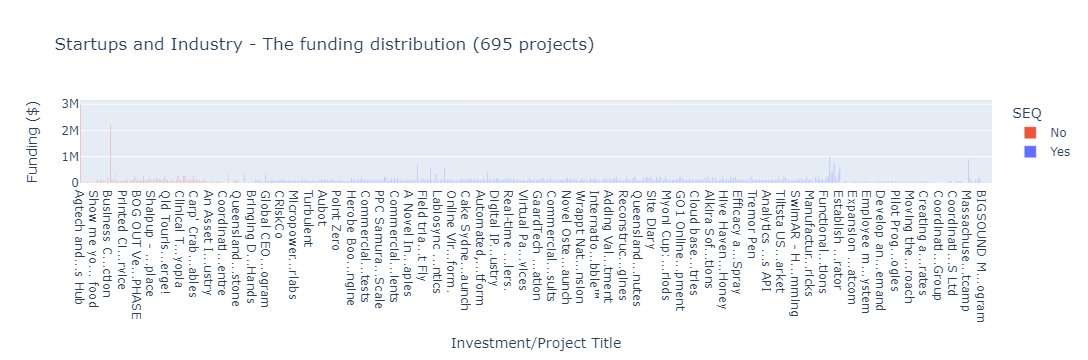

/tmp/ipykernel_161/1037368186.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



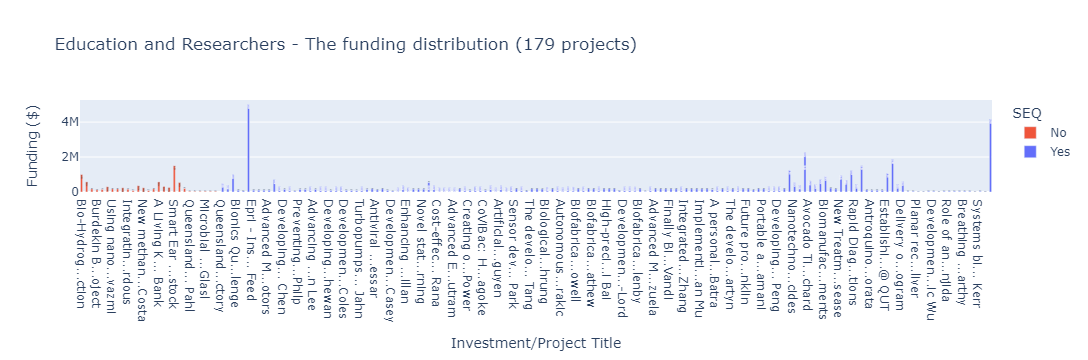

/tmp/ipykernel_161/1037368186.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



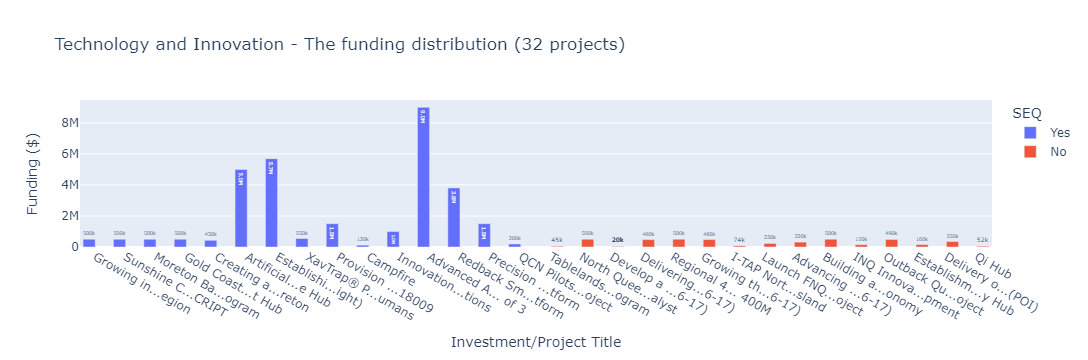

/tmp/ipykernel_161/1037368186.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



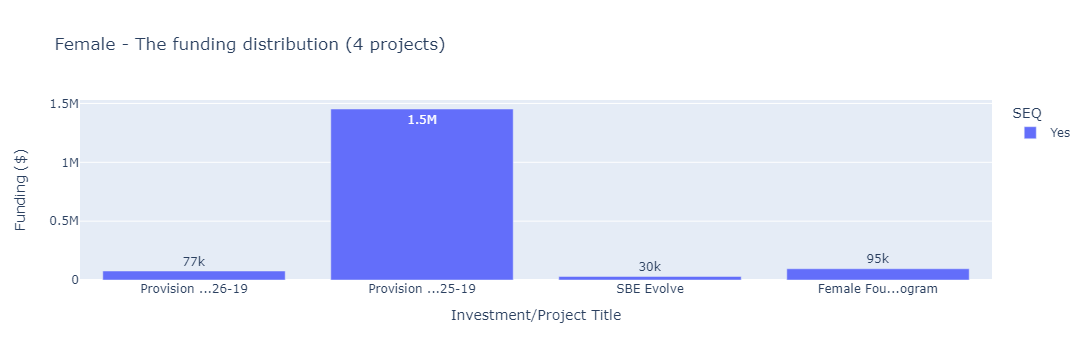

/tmp/ipykernel_161/1037368186.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



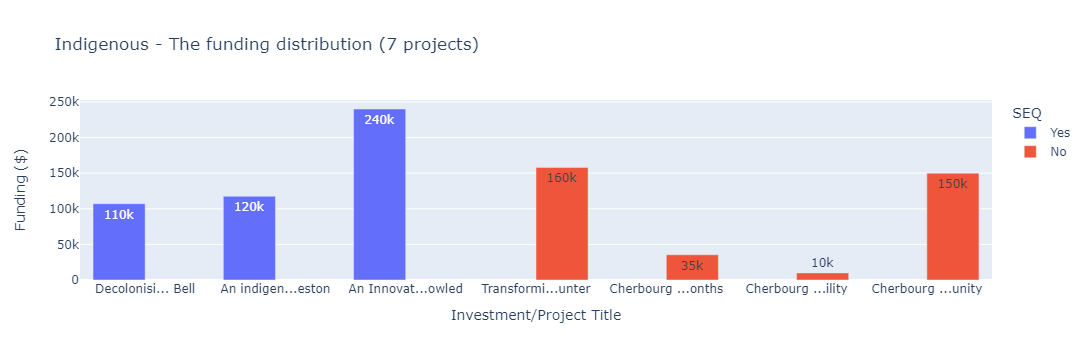

In [44]:
def recipient(list, name):
    filtered_df = df_B[df_B['Program'].isin(list)]
    list_len = len(filtered_df['Investment/Project Title'].unique())
    plot_trim_col_len = trim_col_len(filtered_df, 'Investment/Project Title')
    color_map = {'Yes': '#636efa', 'No': '#ef553b'}
    fig = px.bar(plot_trim_col_len, x='Investment/Project Title', y='Actual Contractual Commitment ($)', color='SEQ', color_discrete_map=color_map, text_auto='.2s',
             title = name + ' - ' + 'The funding distribution' + ' (' + str(list_len) + ' projects)' , barmode='group')
    fig.update_layout(yaxis_title='Funding ($)')
    fig.show()
    
recipient(industry_list, 'Startups and Industry')
recipient(education_list, 'Education and Researchers')
recipient(technology_list, 'Technology and Innovation')
recipient(female_list, 'Female')
recipient(indigenous_list, 'Indigenous')

---
**Startups and Industry** community includes **695 projects** which is challenging to visualize all the projects in one bar chart. However, there are still visual differences in the bar chart. According to the chart, it is obvious that there are several projects have higher funding compared to others. For instance, two projects in the Non-SEQ region have over \\$2M funding and two projects in the SEQ region have approximately \\$1M. However, it is difficult to consider it as an unbalanced case. Since the SEQ region has more projects than the Non-SEQ region, and some projects in the SEQ region have over $500K, the last consideration is the chart does not include all the projects.

**Education and Researchers** community includes **179 projects** which is challenging to visualize all the projects in one bar chart. However, there are still visual differences in the bar chart. According to the chart, it is obvious that the number of projects in the SEQ region is higher than the Non-SEQ region. Moreover, two projects in the SEQ region have over $4M funding which is over the funding of the Non-SEQ region in this community. However, since the bar chart does not include all the project, therefore, it is not completely correct.  

**Technology and Innovation** community includes **32 projects** which is challenging to visualize all the projects in one bar chart. However, the bar chart includes 95% of the projects and there are some visual differences in the bar chart. According to the chart, it is obvious that most of the funding in this community is to the SEQ region, although the number of projects is relatively distributed well compared to other communities. However, since the bar chart does not include all the projects, therefore, it is not completely correct.

**Female** community includes **4 projects**. The bar chart displays that the projects and their funding are merely distributed to the SEQ region. Additionally, the project with the highest funding in this community does not directly relate to the community. It is a sign of a lack of oversight and monitoring problems, especially for the huge fund.  

**Indigenous** community includes **7 projects**. The bar chart illustrates that the projects and their funding are distributed well compared to other communities which is good news.

After understanding the above charts, it is noticeable that the numbers of projects between the SEQ and Non-SEQ regions are unbalanced as well as the funding distribution. However, the population density should also be considered while observing the unbalanced issue. Luckily, there is a balanced distribution in the Indigenous community.

---

The bar charts display the funding of projects. However, since the bar chart cannot include all the projects in several communities, additionally, when the funding is below to certain number, the projects might not have a great impact on the analysis. Therefore, based on the above bar charts, I would like to focus on those projects that stand out with certain funding and analyse their reasonability. 

Below are the certain funding for each community that stands out in the bar charts:

- Startups and Industry - $460K
  
- Education and Researchers - $600K
  
- Technology and Innovation - $478K
  
- Female - $95K
  
- Indigenous - $110K

#### The Funding Distribution of Each Project with Certain Funding

I filtered out the projects without certain funding and visualized it with a bar chart to understand the reasonability of each project.

Based on the certain funding for each community, I created a dataframe that is focused on projects that have a certain impact on the program (including the SEQ and Non-SEQ regions). 

In [45]:
project_df = pd.DataFrame(df_B.groupby(['Program Community', 'Investment/Project Title', 'SEQ'])['Actual Contractual Commitment ($)'].sum()).reset_index()

def filter_high(community, number):
        project_filtered = project_df[(project_df['Program Community'] == community) & (project_df['Actual Contractual Commitment ($)'] >= number)]
        # project_filtered.append(item)
        return project_filtered

concat_project_df = pd.concat([filter_high('Startups and Industry', 460000), filter_high('Education and Researchers', 600000), filter_high('Technology and Innovation', 478000), filter_high('Female', 95000), filter_high('Indigenous', 110000)], axis=0)
concat_project_df

,Program Community,Investment/Project Title,SEQ,Actual Contractual Commitment ($)
217,Startups and Industry,Agtech and Logistics Hub,No,3000000
510,Startups and Industry,Establish a Brisbane-based accelerator partner...,Yes,1000000
511,Startups and Industry,Establish the ‘Collider’ accelerator,Yes,615000
557,Startups and Industry,Growing Queensland's Companies,No,2202334
639,Startups and Industry,Massachusetts Institute of Technology (MIT) Gl...,Yes,900000
659,Startups and Industry,Muru-D startup accelerator program,Yes,750000
6,Education and Researchers,Additive Biomanufacturing Technology Platform,Yes,705000
12,Education and Researchers,Advancing Cerebral Palsy in Queensland,Yes,1499710
14,Education and Researchers,Advancing Tropical Pulses for Queensland,Yes,750000
29,Education and Researchers,Avocado Tissue-Culture: From Lab-to-Orchard,Yes,636000


Let's visualize them in graph formats.

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



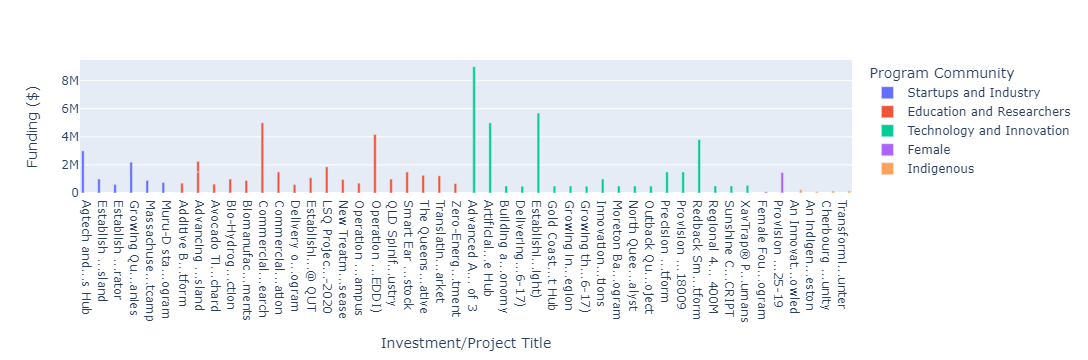

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



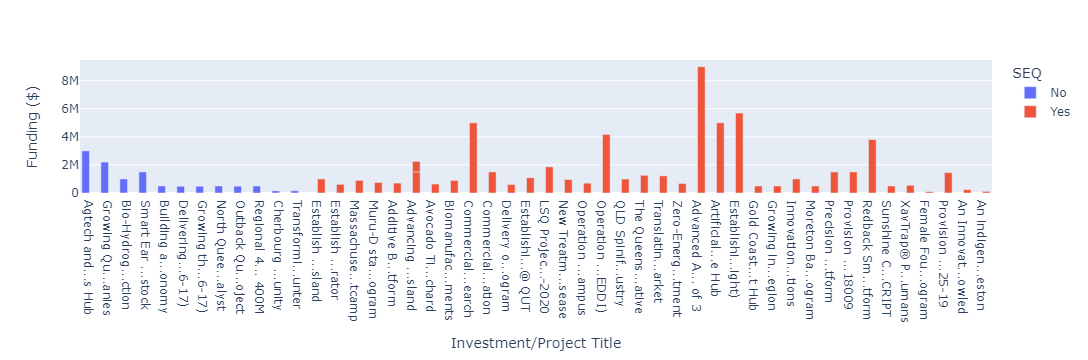

In [46]:
plot_concat_project_df = trim_col_len(concat_project_df, 'Investment/Project Title')
def different_col(col):
    fig = px.bar(plot_concat_project_df, x='Investment/Project Title', y='Actual Contractual Commitment ($)', color=col, barmode='group')
    fig.update_layout(yaxis_title='Funding ($)')
    fig.show()

different_col('Program Community')
different_col('SEQ')

##### How do distributions align with the objectives of the scheme which may include supporting specified groups of people?
Since the projects are filtered out which mean their funding could have a great impact on the analysis. Therefore, it is vital that their distributions align with the objectives of the scheme, especially those projects that should focus on specified groups of people.  

The bar chart illustrates an issue as follow:

**Project names does not align with the target community**
- Female Community:
  
  In the female community, the **Provision of Innovation Services Contract No. DITID25-19** project has the highest funding compared to other projects. However, it doesn't directly relate to the female community. DITID stands for the Department of Innovation, Tourism Industry Development and the Commonwealth Games which does not specifically focus on the female community. Therefore, it does not make sense that these two projects are in the ***Female Founders Program***.



### Summary

The dataset is about the funding recipients of Advance Queensland programs administered by the Department of Tourism, Innovation and Sport. The programs in the dataset are meant to support the knowledge-based jobs of the future in Queensland. 

As a data analyst, the analysis focuses on the funding distribution and the alignment with program objectives. 

***Key Findings:***

**1. Unusual cases**
   While preparing data, 20 NonQueensland values in the RAP Region category which is unusual. This is because the dataset is about Queensland programs, it does not make sense if the programs' recipients were located outside of Queensland.
   
**2. Total Funding for each program**
   Ignite Ideas Fund program has the highest funding than other programs followed by Industry Research Fellowships and Innovation Partnerships Grants programs. 
   
**3. The Funding Distribution between the RAP Region**
   The funding distribution is seriously unbalanced between the SEQ and the Non-SEQ regions. However, to clarify whether it is unbalanced, the population density data will be needed as a consideration.
   
**4. Categorize Programs with Communities**
   Programs are categorized into "Startups and Industry", "Education and Researchers", "Technology and Innovation", "Female", and "Indigenous". The last two communities are considered as specified groups of people which means Advance Queensland programs include some specific communities.
   
**5. The Funding Distribution Between Communities (marked with separate SEQ & Non-SEQ regions)**
   The differences in funding between communities are significant, the funding of "Female", and "Indigenous" communities are extremely lower than other communities. Moreover, majority of the funding were located in SEQ region.  

**6. The Reasonability of Each Community's Funding Distribution**
   One of projects in the female community with highest funding does not relate directly to the community.   

***Recommendations as a Data Analyst:***
1. Build a standard to evaluate the distribution to ensure fairness and equity to solve the issue of the funding of the program being distributed unbalanced.
2. Improve the publicity of the funding distribution process to decrease the potential for bias and difference.
3. Collect more relative data such as the population density to ensure the

Overall, the analysis provides valuable insight into the funding distribution. Since Advance Queensland programs have run for 9 years and include over 1000 projects for supporting diverse communities. Therefore, it is crucial to understand the funding distribution is unbalanced not only for programs but also for the communities. This is because based on the information, the government can understand the distribution, enhance the entire Advance Queensland programs with a transparent process and inclusivity, and help more people. However, it will need more data to support some unbalanced situations such as the difference in funding between the SEQ and Non-SEQ regions.
